<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li><li><span><a href="#Общий-вывод-проекта:" data-toc-modified-id="Общий-вывод-проекта:-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод проекта:</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

## Загрузка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("/datasets/insurance.csv")

df.head()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [4]:
X = df.drop("Страховые выплаты", axis=1)
y = df["Страховые выплаты"]
X.shape, y.shape

((5000, 4), (5000,))

In [5]:
df.duplicated().sum()

153

**Что сделал/выводы:**
1. Изучил данные, пропусков данных нет, но есть дубликанты.
2. Дубликанты не удаляю, поскольку стоит задача сохранить эти данные.

Далее более подробно рассмотрю распределение данных по количеству членов семьи, возрасту, полу, зарплате и страховым выплатам.

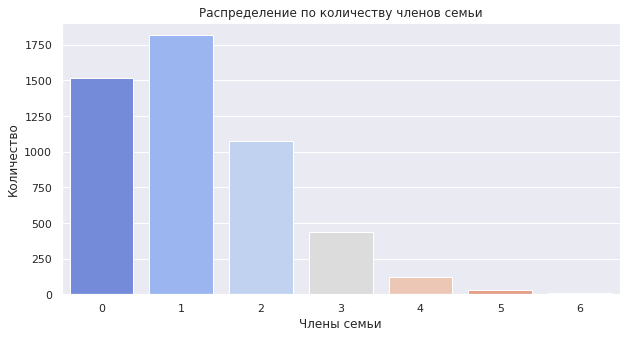

In [6]:
sns.set()
fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(x='Члены семьи', data=df, palette='coolwarm')
ax.set_title('Распределение по количеству членов семьи')
plt.ylabel('Количество');

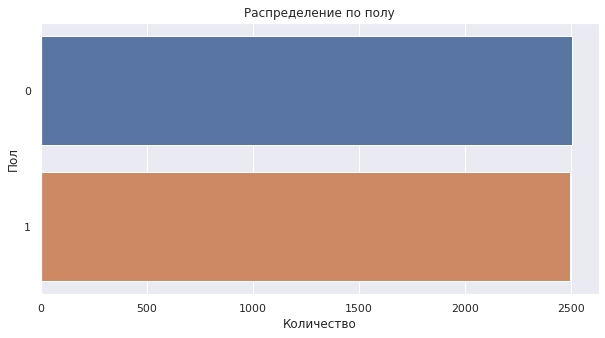

In [7]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(y='Пол', data=df)
ax.set_title('Распределение по полу')
plt.xlabel('Количество');

Text(0.5, 0, 'Количество')

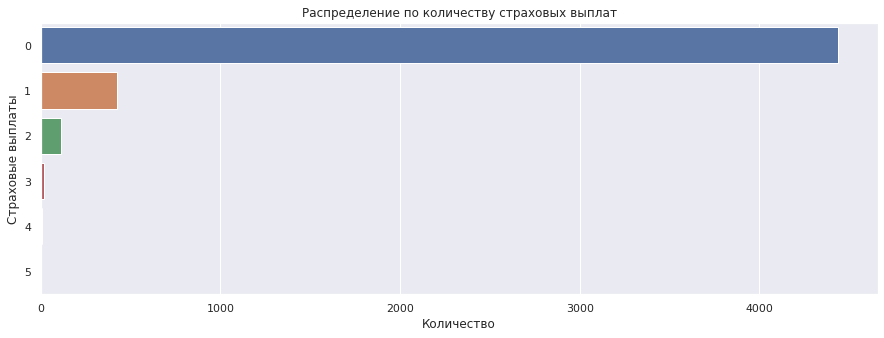

In [8]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.countplot(y='Страховые выплаты', data=df)
ax.set_title('Распределение по количеству страховых выплат')
plt.xlabel('Количество')

Text(0, 0.5, 'Плотность частоты')

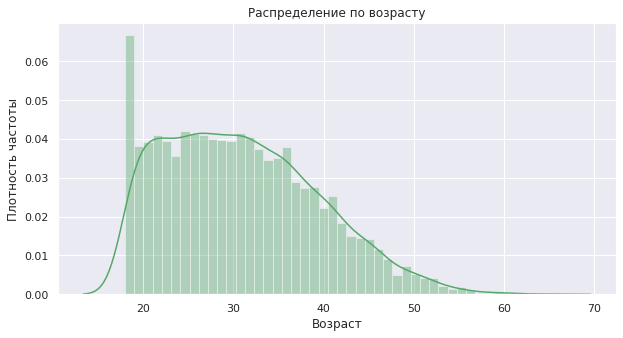

In [9]:
sns.set()
fig, ax = plt.subplots(figsize=(10, 5))
sns.distplot(df['Возраст'], bins=len(df['Возраст'].unique()), color="g")
ax.set_title('Распределение по возрасту')
plt.ylabel('Плотность частоты')

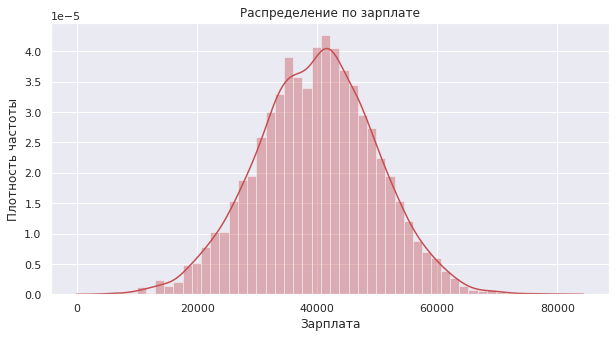

In [10]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.distplot(df['Зарплата'],color="r")
ax.set_title('Распределение по зарплате')
plt.ylabel('Плотность частоты');

**Вывод по 1 главе:**
1. Изучил данные, пропусков данных нет, но есть дубликанты.
2. Дубликанты не удаляю, поскольку стоит задача сохранить эти данные.
3. Выбрасов и аномалий данных нет, данные готовы к работе.

## Умножение матриц

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**План работы:**
1. Разделю данные на признаки.
2. Создам класс линейной регрессии и напишу 2 метода fit и predict, которые найдут веса и сделают предсказания.
3. Создам модель и обучу. Найду её предсказания на обучающей выборке. 
4. Найду веса и значение метрики R2 по MSE.

In [11]:
features = df.drop('Страховые выплаты', axis=1)
target = df['Страховые выплаты']

In [12]:
class LR:
    def fit(self, train_features, train_target):
        X = np.concatenate((np.ones((train_features.shape[0], 1)), train_features), axis=1)
        y = train_target
        w = np.linalg.inv((X.T @ X)).dot(X.T).dot(y)
        self.w = w[1:]
        self.w0 = w[0]
        print(w)
        
    def predict(self, test_features):
        return test_features.dot(self.w) + self.w0

In [13]:
model = LR()
model.fit(features, target)
predictions = model.predict(features)
r2_score(target, predictions)

[-9.38235504e-01  7.92580543e-03  3.57083050e-02 -1.70080492e-07
 -1.35676623e-02]


0.4249455028666801

Создадам случайную квадратную матрицу, размером по количеству столбцов и проверю на обратимость

In [14]:
rnd_matrix = np.random.normal(0, 1, (features.shape[1], features.shape[1]))
rnd_matrix

array([[ 0.70258867, -1.27923908,  0.48444957,  0.79562903],
       [-0.58359324, -0.52897583, -0.683933  , -0.13342171],
       [-0.2078513 , -0.03691465,  1.65348441, -0.30431941],
       [-0.3606707 , -1.66538219, -0.04104817, -1.38661006]])

In [15]:
np.linalg.inv(rnd_matrix)

array([[ 0.15380159, -1.52658605, -0.66703404,  0.3815349 ],
       [-0.39480395, -0.34872207, -0.03317997, -0.18569971],
       [ 0.08993774, -0.04925031,  0.5564285 , -0.0657747 ],
       [ 0.4315099 ,  0.81736895,  0.19688057, -0.59544321]])

In [16]:
rnd_matrix @ np.linalg.inv(rnd_matrix)

array([[ 1.00000000e+00, -8.85361485e-17, -4.46349831e-17,
        -1.95424609e-17],
       [-1.22555934e-16,  1.00000000e+00,  4.72501928e-17,
         1.92563971e-16],
       [ 3.79161943e-17,  4.20543382e-17,  1.00000000e+00,
         2.76968899e-17],
       [-4.40615562e-17,  4.73988278e-17,  2.67684764e-17,
         1.00000000e+00]])

In [17]:
encoded_features = features.dot(rnd_matrix)
encoded_features

,0,1,2,3
0,-10333.010002,-1855.599096,81985.229113,-15100.303850
1,-7925.555449,-1428.754837,62800.905789,-11571.661468
2,-4381.801554,-790.547875,34703.338650,-6394.576773
3,-8680.376108,-1553.780015,68935.855400,-12695.694341
4,-5440.557014,-979.562836,43137.277547,-7945.676697
...,...,...,...,...
4995,-7437.353446,-1335.994967,59010.161381,-10870.711852
4996,-10911.611084,-1953.978036,86619.288555,-15952.259866
4997,-7058.552356,-1265.316797,56039.360899,-10321.869546
4998,-6809.956062,-1225.021794,54054.255137,-9957.544082


Обучу модель на новых признаках, найду предсказания, веса и метрику R2

In [18]:
model = LR()
model.fit(encoded_features, target)
predictions = model.predict(encoded_features)
r2_score(target, predictions)

[-9.38235504e-01 -5.84692229e-02 -1.30618953e-02 -1.53502116e-04
  4.06856606e-02]


0.42494550286667554

**Ответ:** Умножив признаки на обратимую матрицу, качество линейной регрессии не меняется.

**Обоснование:** Веса изменились под новые значения. Признаки исходной матрицы и преобразованной выражаются через коэффициенты(веса w), поэтому качество линейной регресии не изменилось.

**Вывод по 2 разделу:**
1. Обучил модель линейной регрессии.
2. Создал случайную матрицу и проверил её на обратимость.
3. Качество линейной регрессии не изменилось.

## Алгоритм преобразования

Напишу алгоритм - функцию преобразования исходных данных в зашифрованный вид, закодировав исходную матрицу.

In [19]:
def code(features):
    random_matrix = np.random.normal(0, 1, (features.shape[1], features.shape[1]))
    coded_features = features.dot(random_matrix)
    return coded_features

In [20]:
code(features)

,0,1,2,3
0,5351.316193,31759.512898,32956.796136,7505.720632
1,4121.039478,24329.841905,25223.175451,5759.040641
2,2282.731680,13445.714825,13932.795824,3185.038433
3,4478.583050,26701.033183,27733.502943,6304.147799
4,2825.684554,16712.143485,17329.697204,3952.299452
...,...,...,...,...
4995,3849.033611,22857.664668,23724.211983,5401.706831
4996,5639.073673,33553.381296,34836.526687,7927.276089
4997,3645.196493,21705.800979,22540.250819,5125.972673
4998,3520.656482,20935.952060,21734.883203,4942.361401


Тоже самое проделаю для расшифровки данных

In [21]:
def decode(encoded_features):
    decoded_features = round(abs(encoded_features.dot(np.linalg.inv(rnd_matrix))))
    for i in decoded_features.iloc[:, [0, 3]]:
        decoded_features[i] = decoded_features[i].astype(int)
    decoded_features.columns = features.columns
    return decoded_features

In [22]:
decode(encoded_features)

,Пол,Возраст,Зарплата,Члены семьи
0,1,41.0,49600.0,1
1,0,46.0,38000.0,1
2,0,29.0,21000.0,0
3,0,21.0,41700.0,2
4,1,28.0,26100.0,0
...,...,...,...,...
4995,0,28.0,35700.0,2
4996,0,34.0,52400.0,1
4997,0,20.0,33900.0,2
4998,1,22.0,32700.0,3


In [23]:
encoded_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       5000 non-null   float64
 1   1       5000 non-null   float64
 2   2       5000 non-null   float64
 3   3       5000 non-null   float64
dtypes: float64(4)
memory usage: 156.4 KB


In [24]:
features

,Пол,Возраст,Зарплата,Члены семьи
0,1,41.0,49600.0,1
1,0,46.0,38000.0,1
2,0,29.0,21000.0,0
3,0,21.0,41700.0,2
4,1,28.0,26100.0,0
...,...,...,...,...
4995,0,28.0,35700.0,2
4996,0,34.0,52400.0,1
4997,0,20.0,33900.0,2
4998,1,22.0,32700.0,3


In [25]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Пол          5000 non-null   int64  
 1   Возраст      5000 non-null   float64
 2   Зарплата     5000 non-null   float64
 3   Члены семьи  5000 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 156.4 KB


**Обоснование алгоритма**
Умножив признаки на обратимую матрицу, качество линейной регрессии не меняется. Это обусловленно тем, что Веса изменились под новые значения, т.е. признаки исходной матрицы и преобразованной выражаются через весовые коэффициенты. Случайность реализованная в алгоритме каждый раз разная, что делает зашифрованные данные каждый раз новыми.

**Вывод по 3 главе:**
1. Предложенный алгоритм преобразования данных справляется с решением задачи.
2. Качество линейной регрессии не меняется. Новые признаки выражаются через исходную матрицу, умножив на случайную матрицу, соответственно и новые коэффициенты весов. Но так как оба множителя в произведении выражают исходные через определенные коэффициенты, то качество линейной регресии не измениться.

## Проверка алгоритма

Для проверки качества линейной регрессии до и после преобразования применю метрику R2. Для этого создам модель sklearn_model и обучу на 2 обучающих матрицах: исходной features и кодированной encoded_features.

In [26]:
sklearn_model = LinearRegression().fit(features, target)
pred = sklearn_model.predict(features)
r2_score(target, pred)

0.42494550286668

In [27]:
sklearn_model.fit(encoded_features, target)
pred = sklearn_model.predict(encoded_features)
r2_score(target, pred)

0.42494550286667654

**Вывод по 4 разделу**
1. Качество модели линейной регрессии по 2м наборам признаков совпадает

## Общий вывод проекта:
1. Умножив признаки на обратимую матрицу, качество линейной регрессии не меняется.
2. Предложенный алгоритм преобразования данных справляется для решения задачи шифрования признаков.
3. Зашифрованные данные так же пригодны для предсказаний с помощью линейной регресии.
4. Случайность реализованная в алгоритме каждый раз меняется при запуске, что делает зашифрованные данные каждый раз новыми.
5. Реализованный алгоритм удовлетворяет поставленной задаче.

## Чек-лист проверки

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные загружены
- [x]  Выполнен шаг 2: получен ответ на вопрос об умножении матриц
    - [x]  Указан правильный вариант ответа
    - [x]  Вариант обоснован
- [x]  Выполнен шаг 3: предложен алгоритм преобразования
    - [x]  Алгоритм описан
    - [x]  Алгоритм обоснован
- [x]  Выполнен шаг 4: алгоритм проверен
    - [x]  Алгоритм реализован
    - [x]  Проведено сравнение качества моделей до и после преобразования